In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Outliers on both side

In [114]:
# step1: creata data

# np.random.seed(42)
# data = np.random.normal(50, 5, 40)  # mean=50, std=5
# data_with_outliers = np.append(data, [28, 31, 68, 75, 74])  # # Add left and right outliers
# data_with_outliers = data_with_outliers.astype(int)

# somewhere in this data, there are number that do statistically not belong in here
data = np.array([52, 48, 45, 44, 49, 55, 40, 46, 44, 53, 47, 47, 48, 52, 48, 34,
                 52, 52, 48, 44, 51, 51, 47, 48, 45, 49, 42, 52, 45, 51, 42, 47,
                 49, 41, 50, 48, 41, 43, 53, 54, 28, 31, 68, 75, 74])

print("Dataset:\n", ", ".join(map(str, data)))
print("\nOrdered dataset:\n", ", ".join(map(str, np.sort(data))))

Dataset:
 52, 48, 45, 44, 49, 55, 40, 46, 44, 53, 47, 47, 48, 52, 48, 34, 52, 52, 48, 44, 51, 51, 47, 48, 45, 49, 42, 52, 45, 51, 42, 47, 49, 41, 50, 48, 41, 43, 53, 54, 28, 31, 68, 75, 74

Ordered dataset:
 28, 31, 34, 40, 41, 41, 42, 42, 43, 44, 44, 44, 45, 45, 45, 46, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 54, 55, 68, 74, 75


In [99]:
# step2: lets find outliers using IQR:

# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Calculate boundaries for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

# Detect outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
normal_points = data[(data >= lower_bound) & (data <= upper_bound)] # used later
print("\nOutliers detected:", outliers)


Q1 = 44.00, Q3 = 52.00, IQR = 8.00
Lower Bound = 32.00, Upper Bound = 64.00

Outliers detected: [28 31 68 75 74]


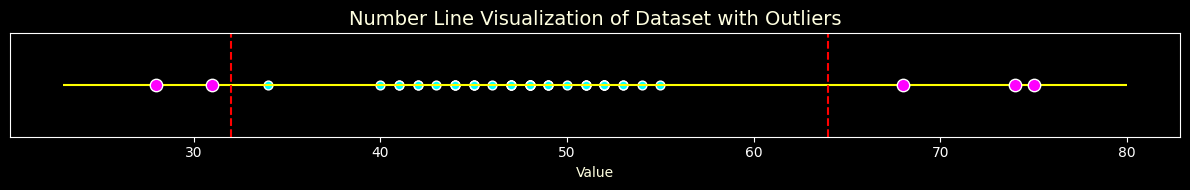

In [100]:
# step3: plot seperately the outliers and normal points on a number line

plt.style.use('dark_background')
plt.figure(figsize=(12, 2))

# Plot normal points
plt.scatter(normal_points, np.zeros_like(normal_points), color='cyan', s=40, label='Normal Points', edgecolor='white')

# Plot outliers
plt.scatter(outliers, np.zeros_like(outliers), color='magenta', s=80, label='Outliers', edgecolor='white', zorder=3)

# Draw number line
plt.hlines(0, min(data) - 5, max(data) + 5, colors='yellow', linewidth=1.5)

# Mark bounds
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.1f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.1f})')

# Labels and style
plt.title("Number Line Visualization of Dataset with Outliers", color='lightyellow', fontsize=14)
plt.xlabel("Value", color='lightyellow')
plt.yticks([])  # hide y-axis
plt.tight_layout()
plt.show()


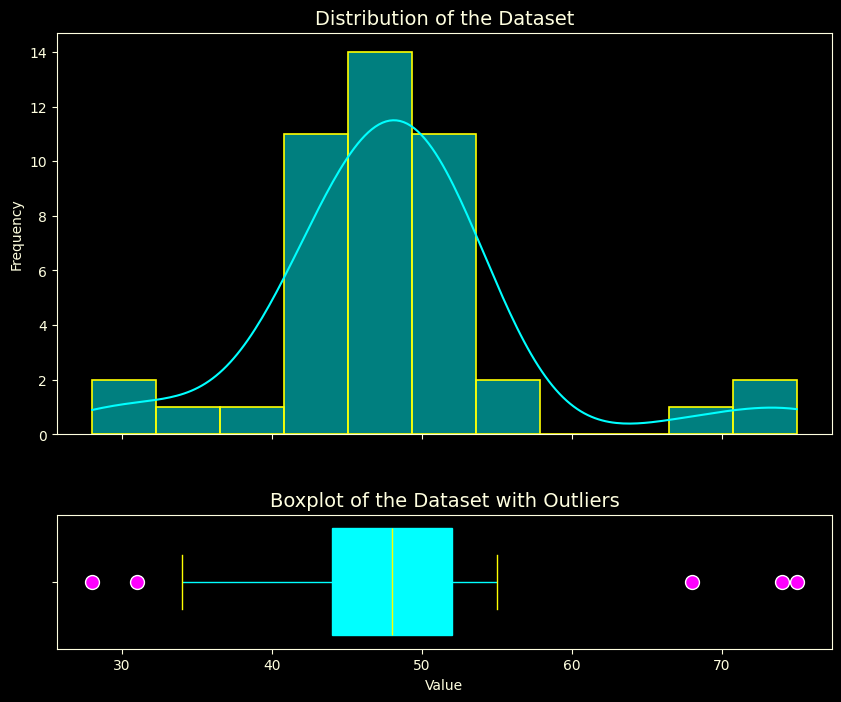

In [101]:
# Step 4: Plot distribution curve and boxplot together

plt.style.use('dark_background')

# Create two vertically stacked subplots sharing the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.3)  # space between plots

# --- Histogram with KDE ---
sns.histplot(
    data,
    kde=True,
    color='cyan',
    edgecolor='yellow',
    linewidth=1.2,
    ax=ax1
)
ax1.set_title('Distribution of the Dataset', color='lightyellow', fontsize=14)
ax1.set_ylabel('Frequency', color='lightyellow')
ax1.tick_params(colors='lightyellow')
for spine in ax1.spines.values():
    spine.set_color('lightyellow')

# --- Boxplot ---
sns.boxplot(
    x=data,
    color='cyan',
    ax=ax2,
    boxprops=dict(facecolor='black', color='cyan'),
    medianprops=dict(color='yellow'),
    whiskerprops=dict(color='cyan'),
    capprops=dict(color='yellow'),
    flierprops=dict(
        marker='o',
        markerfacecolor='magenta',
        markeredgecolor='white',
        markersize=10,
        alpha=1.0
    )
)
ax2.set_title('Boxplot of the Dataset with Outliers', color='lightyellow', fontsize=14)
ax2.set_xlabel('Value', color='lightyellow')
ax2.tick_params(colors='lightyellow')
for spine in ax2.spines.values():
    spine.set_color('lightyellow')

plt.show()

In [102]:
# step5: Lets find outliers using z-score method:

z_scores = stats.zscore(data)

# Sort data and z-scores together
sorted_indices = np.argsort(data)
sorted_data = data[sorted_indices]
sorted_z_scores = z_scores[sorted_indices]

# Set threshold (commonly 3, sometimes 2.5 for smaller datasets)
threshold = 2.3

# Identify outliers
outliers = sorted_data[(sorted_z_scores < -threshold) | (sorted_z_scores > threshold)]

# Display results
print("Sorted Dataset:\n", ", ".join(map(str, sorted_data)))
print("\nSorted Z-scores:\n", ", ".join(map(str, np.round(sorted_z_scores, 2))))
print(f"\nDetected Outliers (z < -{threshold} or z > +{threshold}): {', '.join(map(str, outliers))}")

Sorted Dataset:
 28, 31, 34, 40, 41, 41, 42, 42, 43, 44, 44, 44, 45, 45, 45, 46, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 54, 55, 68, 74, 75

Sorted Z-scores:
 -2.38, -2.03, -1.67, -0.97, -0.85, -0.85, -0.74, -0.74, -0.62, -0.5, -0.5, -0.5, -0.39, -0.39, -0.39, -0.27, -0.15, -0.15, -0.15, -0.15, -0.03, -0.03, -0.03, -0.03, -0.03, -0.03, 0.08, 0.08, 0.08, 0.2, 0.32, 0.32, 0.32, 0.43, 0.43, 0.43, 0.43, 0.43, 0.55, 0.55, 0.67, 0.79, 2.31, 3.01, 3.13

Detected Outliers (z < -2.3 or z > +2.3): 28, 68, 74, 75


## 2. Right skewness

In [115]:
# step1: Create a dataset with right skewness
np.random.seed(0)
data = np.random.exponential(scale=10, size=200)

# Add some outliers to the dataset
outliers = np.random.uniform(low=20, high=30, size=4)
data = np.concatenate((data, outliers))
data = np.round(data,3)

np.set_printoptions(suppress=True, precision=3)
print("Dataset:\n", ", ".join(map(str, data)))
print("\nOrdered dataset:\n", ", ".join(map(str, np.sort(data))))

Dataset:
 7.959, 12.559, 9.232, 7.872, 5.51, 10.382, 5.755, 22.235, 33.149, 4.836, 15.689, 7.527, 8.394, 25.983, 0.737, 0.912, 0.204, 17.875, 15.058, 20.403, 38.452, 16.052, 6.189, 15.165, 1.259, 10.214, 1.547, 28.944, 7.378, 5.356, 3.073, 14.883, 6.091, 8.403, 0.19, 9.614, 9.47, 9.595, 28.779, 11.451, 4.455, 5.745, 11.961, 0.621, 10.989, 11.106, 2.362, 1.38, 3.79, 4.521, 8.444, 5.773, 44.545, 1.076, 2.343, 1.759, 10.587, 2.921, 6.279, 2.803, 1.731, 1.17, 10.681, 1.487, 2.189, 4.6, 17.203, 1.021, 18.198, 1.01, 37.49, 6.323, 37.619, 9.285, 13.442, 0.4, 3.324, 1.281, 3.512, 1.264, 3.827, 5.349, 0.663, 11.792, 8.361, 3.084, 7.408, 0.987, 8.579, 26.493, 3.836, 11.008, 1.413, 12.599, 3.417, 2.024, 8.831, 0.203, 17.657, 0.047, 11.326, 3.147, 13.288, 32.751, 2.86, 8.584, 8.966, 8.492, 2.524, 30.523, 5.926, 18.735, 12.022, 3.53, 16.809, 5.05, 21.295, 8.705, 21.348, 11.794, 12.919, 6.958, 31.255, 10.328, 5.514, 9.324, 0.194, 3.589, 10.793, 3.426, 9.624, 5.6, 1.456, 3.542, 8.439, 8.937, 8.541, 1

In [116]:
# step2: lets find outliers using IQR:

# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Calculate boundaries for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

# Detect outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
normal_points = data[(data >= lower_bound) & (data <= upper_bound)] # used later
print("\nOutliers detected:", outliers)


Q1 = 2.93, Q3 = 12.96, IQR = 10.03
Lower Bound = -12.12, Upper Bound = 28.01

Outliers detected: [33.149 38.452 28.944 28.779 44.545 37.49  37.619 32.751 30.523 31.255
 67.654 37.1   28.891]


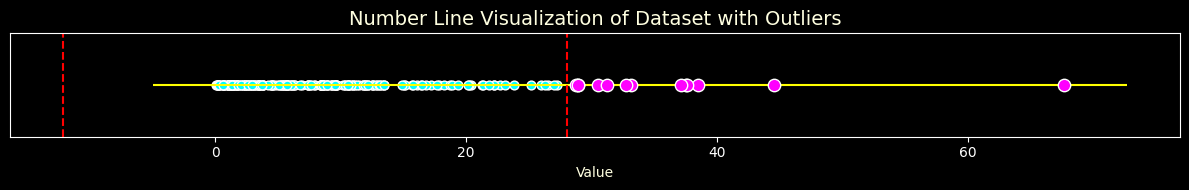

In [105]:
# step3: plot seperately the outliers and normal points on a number line

plt.style.use('dark_background')
plt.figure(figsize=(12, 2))

# Plot normal points
plt.scatter(normal_points, np.zeros_like(normal_points), color='cyan', s=40, label='Normal Points', edgecolor='white')

# Plot outliers
plt.scatter(outliers, np.zeros_like(outliers), color='magenta', s=80, label='Outliers', edgecolor='white', zorder=3)

# Draw number line
plt.hlines(0, min(data) - 5, max(data) + 5, colors='yellow', linewidth=1.5)

# Mark bounds
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.1f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.1f})')

# Labels and style
plt.title("Number Line Visualization of Dataset with Outliers", color='lightyellow', fontsize=14)
plt.xlabel("Value", color='lightyellow')
plt.yticks([])  # hide y-axis
plt.tight_layout()
plt.show()


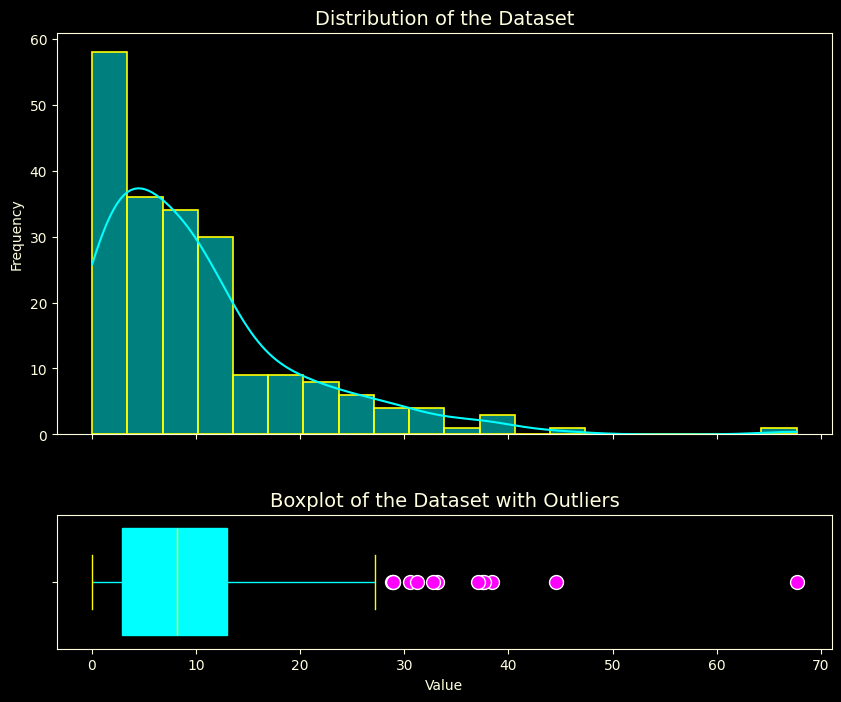

In [106]:
# Step 4: Plot distribution curve and boxplot together

plt.style.use('dark_background')

# Create two vertically stacked subplots sharing the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.3)  # space between plots

# --- Histogram with KDE ---
sns.histplot(
    data,
    kde=True,
    color='cyan',
    edgecolor='yellow',
    linewidth=1.2,
    ax=ax1
)
ax1.set_title('Distribution of the Dataset', color='lightyellow', fontsize=14)
ax1.set_ylabel('Frequency', color='lightyellow')
ax1.tick_params(colors='lightyellow')
for spine in ax1.spines.values():
    spine.set_color('lightyellow')

# --- Boxplot ---
sns.boxplot(
    x=data,
    color='cyan',
    ax=ax2,
    boxprops=dict(facecolor='black', color='cyan'),
    medianprops=dict(color='yellow'),
    whiskerprops=dict(color='cyan'),
    capprops=dict(color='yellow'),
    flierprops=dict(
        marker='o',
        markerfacecolor='magenta',
        markeredgecolor='white',
        markersize=10,
        alpha=1.0
    )
)
ax2.set_title('Boxplot of the Dataset with Outliers', color='lightyellow', fontsize=14)
ax2.set_xlabel('Value', color='lightyellow')
ax2.tick_params(colors='lightyellow')
for spine in ax2.spines.values():
    spine.set_color('lightyellow')

plt.show()


In [107]:
# step5: Lets find outliers using z-score method:

z_scores = stats.zscore(data)

# Sort data and z-scores together
sorted_indices = np.argsort(data)
sorted_data = data[sorted_indices]
sorted_z_scores = z_scores[sorted_indices]

# Set threshold (commonly 3, sometimes 2.5 for smaller datasets)
threshold = 2.3

# Identify outliers
outliers = sorted_data[(sorted_z_scores < -threshold) | (sorted_z_scores > threshold)]

# Display results
print("Sorted Dataset:\n", ", ".join(map(str, sorted_data)))
print("\nSorted Z-scores:\n", ", ".join(map(str, np.round(sorted_z_scores, 2))))
print(f"\nDetected Outliers (z < -{threshold} or z > +{threshold}): {', '.join(map(str, outliers))}")

Sorted Dataset:
 0.047, 0.118, 0.187, 0.19, 0.194, 0.203, 0.204, 0.324, 0.4, 0.559, 0.598, 0.621, 0.663, 0.717, 0.737, 0.912, 0.987, 1.01, 1.021, 1.056, 1.076, 1.17, 1.259, 1.264, 1.281, 1.322, 1.38, 1.413, 1.456, 1.487, 1.547, 1.619, 1.731, 1.759, 1.773, 1.8, 1.883, 2.024, 2.06, 2.189, 2.231, 2.343, 2.355, 2.362, 2.524, 2.535, 2.58, 2.717, 2.803, 2.86, 2.921, 2.935, 3.073, 3.084, 3.147, 3.324, 3.417, 3.426, 3.512, 3.53, 3.542, 3.589, 3.739, 3.79, 3.827, 3.836, 4.237, 4.455, 4.463, 4.521, 4.582, 4.6, 4.836, 5.05, 5.079, 5.229, 5.349, 5.356, 5.51, 5.514, 5.6, 5.646, 5.699, 5.725, 5.745, 5.755, 5.773, 5.926, 6.043, 6.091, 6.189, 6.279, 6.323, 6.742, 6.958, 7.361, 7.378, 7.408, 7.527, 7.671, 7.872, 7.959, 8.361, 8.394, 8.403, 8.419, 8.439, 8.444, 8.492, 8.541, 8.579, 8.584, 8.609, 8.705, 8.831, 8.914, 8.937, 8.966, 9.232, 9.285, 9.324, 9.47, 9.518, 9.56, 9.595, 9.614, 9.624, 9.715, 10.214, 10.328, 10.382, 10.558, 10.587, 10.59, 10.681, 10.793, 10.989, 11.008, 11.106, 11.326, 11.451, 11.79

# 3.Left skewed data

In [117]:
# step1: Create a dataset with left skewness

np.random.seed(0)
data = np.random.beta(a=10, b=1, size=200) * 50 # Using beta distribution and scaling

# Add some outliers to the dataset (adjusting outlier range for left skew)
outliers = np.random.uniform(low=0, high=10, size=4)
data = np.concatenate((data, outliers))
data = np.round(data,3)

np.set_printoptions(suppress=True, precision=3)
print("Dataset:\n", ", ".join(map(str, data)))
print("\nOrdered dataset:\n", ", ".join(map(str, np.sort(data))))

Dataset:
 47.69, 45.675, 48.198, 46.22, 49.63, 42.45, 43.689, 43.814, 39.333, 46.559, 46.876, 44.344, 46.509, 48.155, 44.296, 49.33, 46.065, 49.103, 48.274, 48.38, 46.974, 49.537, 45.582, 49.82, 49.205, 47.067, 48.537, 49.424, 45.835, 44.441, 49.859, 49.971, 33.209, 46.845, 41.579, 44.994, 46.498, 46.935, 46.978, 46.048, 48.953, 47.321, 47.4, 47.511, 48.366, 48.268, 45.696, 39.245, 42.623, 44.371, 46.346, 41.032, 49.629, 49.918, 37.41, 49.865, 48.79, 43.74, 49.042, 49.104, 48.495, 48.284, 49.283, 49.484, 39.16, 49.912, 47.224, 46.791, 47.077, 43.692, 39.722, 45.333, 49.093, 46.876, 38.322, 44.303, 44.541, 47.588, 42.911, 46.579, 38.076, 49.88, 43.476, 49.572, 38.565, 48.515, 40.719, 48.522, 46.761, 47.407, 28.768, 49.481, 31.18, 46.808, 49.485, 47.532, 39.957, 49.598, 48.845, 49.036, 48.825, 48.884, 46.579, 46.156, 39.337, 45.951, 43.816, 46.237, 48.096, 48.852, 44.92, 45.553, 39.947, 45.284, 48.994, 47.372, 40.426, 43.606, 42.438, 49.706, 47.876, 49.912, 47.748, 41.669, 49.904, 48.407

In [109]:
# step2: lets find outliers using IQR:

# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Calculate boundaries for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

# Detect outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
normal_points = data[(data >= lower_bound) & (data <= upper_bound)] # used later
print("\nOutliers detected:", outliers)


Q1 = 43.82, Q3 = 48.55, IQR = 4.74
Lower Bound = 36.71, Upper Bound = 55.66

Outliers detected: [33.209 28.768 31.18  36.191 35.329 34.87  33.878 25.657 31.804  7.138
  6.392  3.992  4.318]


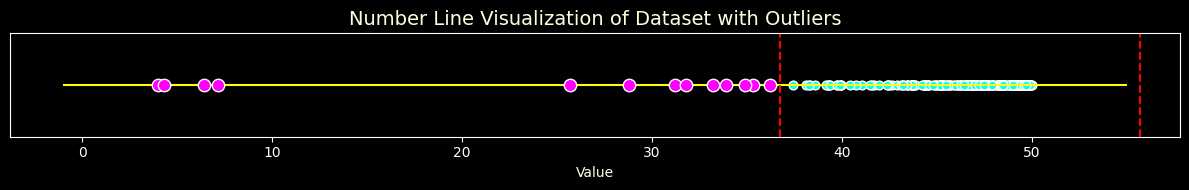

In [110]:
# step3: plot seperately the outliers and normal points on a number line

plt.style.use('dark_background')
plt.figure(figsize=(12, 2))

# Plot normal points
plt.scatter(normal_points, np.zeros_like(normal_points), color='cyan', s=40, label='Normal Points', edgecolor='white')

# Plot outliers
plt.scatter(outliers, np.zeros_like(outliers), color='magenta', s=80, label='Outliers', edgecolor='white', zorder=3)

# Draw number line
plt.hlines(0, min(data) - 5, max(data) + 5, colors='yellow', linewidth=1.5)

# Mark bounds
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.1f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.1f})')

# Labels and style
plt.title("Number Line Visualization of Dataset with Outliers", color='lightyellow', fontsize=14)
plt.xlabel("Value", color='lightyellow')
plt.yticks([])  # hide y-axis
plt.tight_layout()
plt.show()

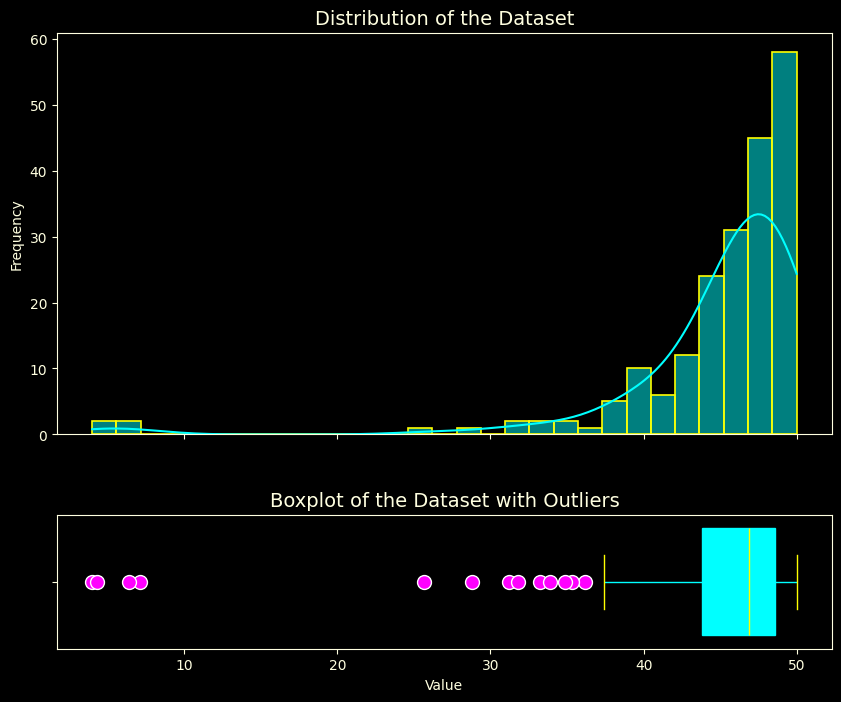

In [111]:
# Step 4: Plot distribution curve and boxplot together

plt.style.use('dark_background')

# Create two vertically stacked subplots sharing the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.3)  # space between plots

# --- Histogram with KDE ---
sns.histplot(
    data,
    kde=True,
    color='cyan',
    edgecolor='yellow',
    linewidth=1.2,
    ax=ax1
)
ax1.set_title('Distribution of the Dataset', color='lightyellow', fontsize=14)
ax1.set_ylabel('Frequency', color='lightyellow')
ax1.tick_params(colors='lightyellow')
for spine in ax1.spines.values():
    spine.set_color('lightyellow')

# --- Boxplot ---
sns.boxplot(
    x=data,
    color='cyan',
    ax=ax2,
    boxprops=dict(facecolor='black', color='cyan'),
    medianprops=dict(color='yellow'),
    whiskerprops=dict(color='cyan'),
    capprops=dict(color='yellow'),
    flierprops=dict(
        marker='o',
        markerfacecolor='magenta',
        markeredgecolor='white',
        markersize=10,
        alpha=1.0
    )
)
ax2.set_title('Boxplot of the Dataset with Outliers', color='lightyellow', fontsize=14)
ax2.set_xlabel('Value', color='lightyellow')
ax2.tick_params(colors='lightyellow')
for spine in ax2.spines.values():
    spine.set_color('lightyellow')

plt.show()


In [112]:
# step5: Lets find outliers using z-score method:

z_scores = stats.zscore(data)

# Sort data and z-scores together
sorted_indices = np.argsort(data)
sorted_data = data[sorted_indices]
sorted_z_scores = z_scores[sorted_indices]

# Set threshold (commonly 3, sometimes 2.5 for smaller datasets)
threshold = 2.3

# Identify outliers
outliers = sorted_data[(sorted_z_scores < -threshold) | (sorted_z_scores > threshold)]

# Display results
print("Sorted Dataset:\n", ", ".join(map(str, sorted_data)))
print("\nSorted Z-scores:\n", ", ".join(map(str, np.round(sorted_z_scores, 2))))
print(f"\nDetected Outliers (z < -{threshold} or z > +{threshold}): {', '.join(map(str, outliers))}")

Sorted Dataset:
 3.992, 4.318, 6.392, 7.138, 25.657, 28.768, 31.18, 31.804, 33.209, 33.878, 34.87, 35.329, 36.191, 37.41, 38.076, 38.244, 38.322, 38.565, 39.16, 39.245, 39.333, 39.337, 39.722, 39.723, 39.907, 39.947, 39.957, 40.426, 40.719, 41.032, 41.445, 41.579, 41.669, 41.954, 42.339, 42.438, 42.45, 42.623, 42.911, 43.122, 43.21, 43.22, 43.42, 43.442, 43.476, 43.606, 43.689, 43.692, 43.698, 43.74, 43.814, 43.816, 44.186, 44.296, 44.303, 44.344, 44.371, 44.441, 44.541, 44.547, 44.57, 44.777, 44.891, 44.92, 44.994, 45.149, 45.161, 45.164, 45.202, 45.213, 45.248, 45.284, 45.333, 45.335, 45.397, 45.492, 45.553, 45.582, 45.675, 45.696, 45.835, 45.951, 46.048, 46.065, 46.156, 46.22, 46.237, 46.278, 46.346, 46.398, 46.498, 46.509, 46.547, 46.559, 46.579, 46.579, 46.658, 46.695, 46.761, 46.791, 46.808, 46.845, 46.876, 46.876, 46.898, 46.903, 46.915, 46.935, 46.974, 46.978, 47.004, 47.067, 47.077, 47.206, 47.224, 47.245, 47.321, 47.372, 47.372, 47.4, 47.407, 47.482, 47.511, 47.532, 47.588, 4